<small><small><i>
All the IPython Notebooks in **Python Data Analytics Projects** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9/93_Python_Data_Analytics_Projects)**
</i></small></small>

# Predicting COVID-19 from Chest X-Ray Images

### STEP 1: IMPORTING LIBRARIES

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### STEP 2: CLONING DATASET

In [1]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone hhttps://github.com/Chiluverichethankumar/-COVID-19-from-Chest-X-Ray-Images.git

Cloning into '-COVID-19-from-Chest-X-Ray-Images'...
git: 'remote-hhttps' is not a git command. See 'git --help'.

The most similar command is
	remote-https


In [2]:
import os

main_dir = "D:\Stady\IBM\all 6\93_Python_Data_Analytics_Projects\002_COVID19_Prediction_from_Chest_Xray_Images_with_CNN\Chext-X-ray-Images-Data-Set\DataSet\My data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [9]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

NameError: name 'train' is not defined

### STEP 3: PERFORMING DATA VISUALIZATION

In [5]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

NameError: name 'train_covid_names' is not defined

<Figure size 1200x1200 with 0 Axes>

# 4) DATA PREPROCESSING AND AUGMENTATION

In [6]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'D:\\Stady\\IBM\x07ll 6\\93_Python_Data_Analytics_Projects\x02_COVID19_Prediction_from_Chest_Xray_Images_with_CNN\\Chext-X-ray-Images-Data-Set\\DataSet\\Data\\train'

In [7]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

NameError: name 'train_generator' is not defined

### STEP 5: BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



NameError: name 'train_generator' is not defined

### STEP 6: COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35, 
                    validation_data = validation_generator)

Epoch 1/35
46/46 [==============================] - 86s 1s/step - loss: 1.6890 - accuracy: 0.6860 - val_loss: 0.4387 - val_accuracy: 0.8094
Epoch 2/35
46/46 [==============================] - 54s 1s/step - loss: 0.2818 - accuracy: 0.8834 - val_loss: 0.2612 - val_accuracy: 0.9171
Epoch 3/35
46/46 [==============================] - 55s 1s/step - loss: 0.1723 - accuracy: 0.9296 - val_loss: 0.1252 - val_accuracy: 0.9586
Epoch 4/35
46/46 [==============================] - 55s 1s/step - loss: 0.1349 - accuracy: 0.9510 - val_loss: 0.1156 - val_accuracy: 0.9613
Epoch 5/35
46/46 [==============================] - 55s 1s/step - loss: 0.1374 - accuracy: 0.9524 - val_loss: 0.1280 - val_accuracy: 0.9669
Epoch 6/35
46/46 [==============================] - 54s 1s/step - loss: 0.1345 - accuracy: 0.9496 - val_loss: 0.0928 - val_accuracy: 0.9641
Epoch 7/35
46/46 [==============================] - 54s 1s/step - loss: 0.1256 - accuracy: 0.9620 - val_loss: 0.0900 - val_accuracy: 0.9669
Epoch 8/35
46/46 [==

# 7) PERFORMING EVALUATION


In [ ]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

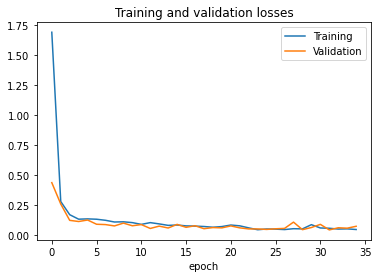

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

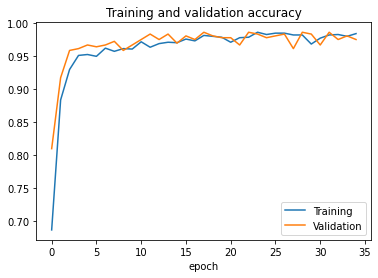

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 12s 760ms/step - loss: 0.1141 - accuracy: 0.9483
Test Set Loss :  0.1140921488404274
Test Set Accuracy :  0.9483470916748047


### STEP 7: PREDICTION ON NEW DATA (UPLOAD FILES)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  
  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving COVID-19 (479).jpg to COVID-19 (479).jpg
The report is COVID-19 Negative


In [ ]:
model.save("model.h5")